In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [185]:
import imageio

In [85]:
life = pd.read_excel('gapminder_lifeexpectancy.xlsx')
fert = pd.read_csv('gapminder_total_fertility.csv', index_col = 0)


#df_countries = pd.read_csv('large_countries_2015.csv', sep = ',')
#df_pops = pd.read_csv('population.csv')
#df_conts = pd.read_csv('continents.csv')

In [141]:
pop = pd.read_excel('gapminder_population.xlsx')

In [ ]:
# continents = pd.read_csv('continents.csv')

### Preparing the fertility df for a merge

In [99]:
### my checking area
fert.head()

,country,year,fertility_rate
0,Abkhazia,1800,NaN
1,Afghanistan,1800,7.00
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,4.60
4,Algeria,1800,6.99


In [93]:
# converting tables to int format to match life df
fert.columns = fert.columns.astype(int)

# changing index name 
fert.index.name = 'country'

In [96]:
# moving the row index into column
# !! only run this code once, multiple times will do multiple resets !!
fert = fert.reset_index()  

In [98]:
# converting (wide to long) data directly via melt function
fert = fert.melt(id_vars = 'country', var_name = 'year', value_name = 'fertility_rate')

### Preparing the fertility df for a merge

In [103]:
### my checking area
life.columns

,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50


In [109]:
# converting tables to int format to match life df                <<=== NOT NEEDED ON THIS DF
# life.columns = life.columns.astype(int)

# changing index name 
life.rename(columns={'Life expectancy' : 'country'}, inplace = True)

In [118]:
#setting index for df
life.set_index('country')

,index,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
country,,,,,,,,,,,,,,,,,,,,,
Abkhazia,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,1,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
Akrotiri and Dhekelia,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,3,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
Algeria,4,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yugoslavia,255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zambia,256,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,...,49.0,51.1,52.3,53.1,53.7,54.7,55.6,56.3,56.7,57.10
Zimbabwe,257,33.70,33.70,33.70,33.70,33.70,33.70,33.70,33.70,33.70,...,46.4,47.3,48.0,49.1,51.6,54.2,55.7,57.0,59.3,61.69


In [129]:
# converting (wide to long) data directly via melt function
life = life.melt(id_vars='country', var_name='year', value_name='life_expectancy')

In [122]:
# index column appears in df, remove entire column via .drop
life.drop('index', axis =1, inplace = True)

In [131]:
# removing NaN values
life.dropna(inplace = True)
fert.dropna(inplace = True)

#### Tidying the Population Table

In [148]:
### my checking area
pop.head()

,country,year,total_population
0,Abkhazia,1800,NaN
1,Afghanistan,1800,3280000.0
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,410445.0
4,Algeria,1800,2503218.0


In [143]:
# changing the column name
pop.rename(columns={'Total population' : 'country'}, inplace = True)

In [145]:
#setting the index
pop.set_index('country')

,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,...,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91
country,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,3280000.0,3280000.0,3323519.0,3448982.0,3625022.0,3810047.0,3973968.0,4169690.0,4419695.0,4710171.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,410445.0,423591.0,438671.0,457234.0,478227.0,506889.0,552800.0,610036.0,672544.0,741688.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,2503218.0,2595056.0,2713079.0,2880355.0,3082721.0,3299305.0,3536468.0,3811028.0,4143163.0,4525691.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Northern Marianas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
South Georgia and the South Sandwich Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
US Minor Outlying Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [147]:
# converting (wide to long) data directly via melt function
pop = pop.melt(id_vars='country', var_name='year', value_name='total_population')

In [151]:
# removing NaN values
pop.dropna(inplace = True)

# Next Steps ...

#### merge all three dataframes into single table (Data Wrangling Encounter)

#### create scatterplot 

In [158]:
# merging dataframes 
df_2 = pd.merge(life, fert, how='inner', on=['country','year'])

In [159]:
df_2.head()

,country,year,life_expectancy,fertility_rate
0,Afghanistan,1800,28.21,7.00
1,Albania,1800,35.40,4.60
2,Algeria,1800,28.82,6.99
3,Angola,1800,26.98,6.93
4,Antigua and Barbuda,1800,33.54,5.00


In [160]:
df = pd.merge(df_2, pop, how='inner', on=['country','year'])

In [161]:
df.head()

,country,year,life_expectancy,fertility_rate,total_population
0,Afghanistan,1800,28.21,7.00,3280000.0
1,Albania,1800,35.40,4.60,410445.0
2,Algeria,1800,28.82,6.99,2503218.0
3,Angola,1800,26.98,6.93,1567028.0
4,Antigua and Barbuda,1800,33.54,5.00,37000.0


In [162]:
df.shape

(16230, 5)

## Plotting The Merged Tables

<AxesSubplot:xlabel='life_expectancy', ylabel='fertility_rate'>

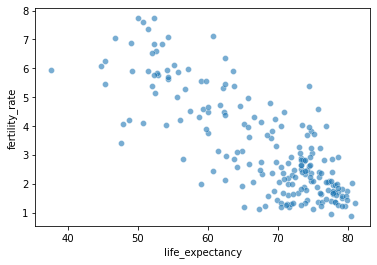

In [164]:
df_subset = df.loc[df['year'] == 2000]
sns.scatterplot(data=df_subset, x='life_expectancy', y='fertility_rate', alpha=0.6)

### Creating a for loop for all years from 1960 to 2015

In [184]:
for i in range(1960, 2016):
    df_subset = df.loc[df['year'] == i]
    plt.axis((4.0, 85.0, 0.5, 10.0))
    plt.title(i)
    fig = sns.scatterplot(
        data=df_subset, 
        x=df_subset['life_expectancy'], 
        y=df_subset['fertility_rate'], 
        size=df_subset['total_population'],
        alpha=0.6,
        legend=False)
    plt.savefig('lifeexp_'+str(i))
    plt.close()

### Creating a GIF file from figures

In [191]:
images = []

for i in range(1960, 2016):
    # filename = 'lifeexp_{}.png'.format(i)
    filename = 'lifeexp_'+str(i)+'.png'
    images.append(imageio.imread(filename))

imageio.mimsave('output.gif', images, fps=20)

# Next Steps ...

#### add and tidy continents.csv, 
#### merge dataframes
#### replot scatter
#### generate new GIF with colours